In [33]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
import math
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
from qiskit.visualization import plot_distribution
import import_ipynb
import advanced

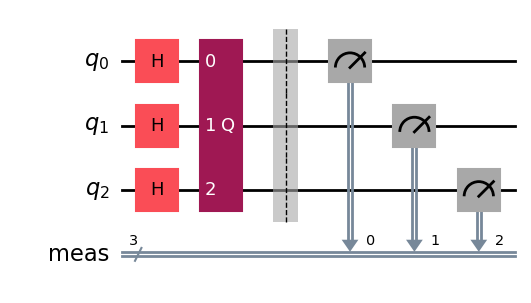

In [34]:
marked_states = ["011", "100"]

grover_op = GroverOperator(advanced.oracle(marked_states))

R = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

qc = QuantumCircuit(grover_op.num_qubits)
qc.h(range(grover_op.num_qubits))
qc.compose(grover_op.power(R), inplace=True)
qc.measure_all()
qc.draw("mpl")

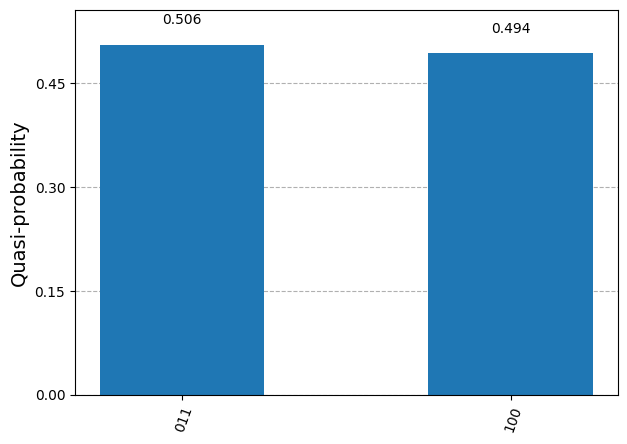

In [35]:
shots = 1024
simulator = AerSimulator()
qc = transpile(qc, simulator)
job = simulator.run(qc)
counts = job.result().get_counts(qc)
plot_distribution(counts)